# Description: 
This program uses an artifitial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of a corporation (eg Apple Inc.) using the past 60 day stock price.

In [1]:
# Installing the libraries before using
'''
pip install pandas_datareader
pip install keras
pip install tensorflow
pip install tensorflow --user
pip install --upgrade tensorflow
'''

'\npip install pandas_datareader\npip install keras\npip install tensorflow\npip install tensorflow --user\npip install --upgrade tensorflow\n'

In [1]:
# Importing the libraries 
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote 
data_frame = web.DataReader('AAL', data_source='yahoo', start='2005-01-01', end='2021-09-26')
# Show the data
data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052805
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806997
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268942
...,...,...,...,...,...,...
2021-09-20,20.370001,19.340000,19.719999,20.330000,43601300.0,20.330000
2021-09-21,20.750000,19.670000,20.420000,19.760000,34050100.0,19.760000
2021-09-22,20.750000,19.930000,19.930000,20.520000,39344300.0,20.520000


In [4]:
# Get the number of rows and columns in the data set 
data_frame.shape

(4027, 6)

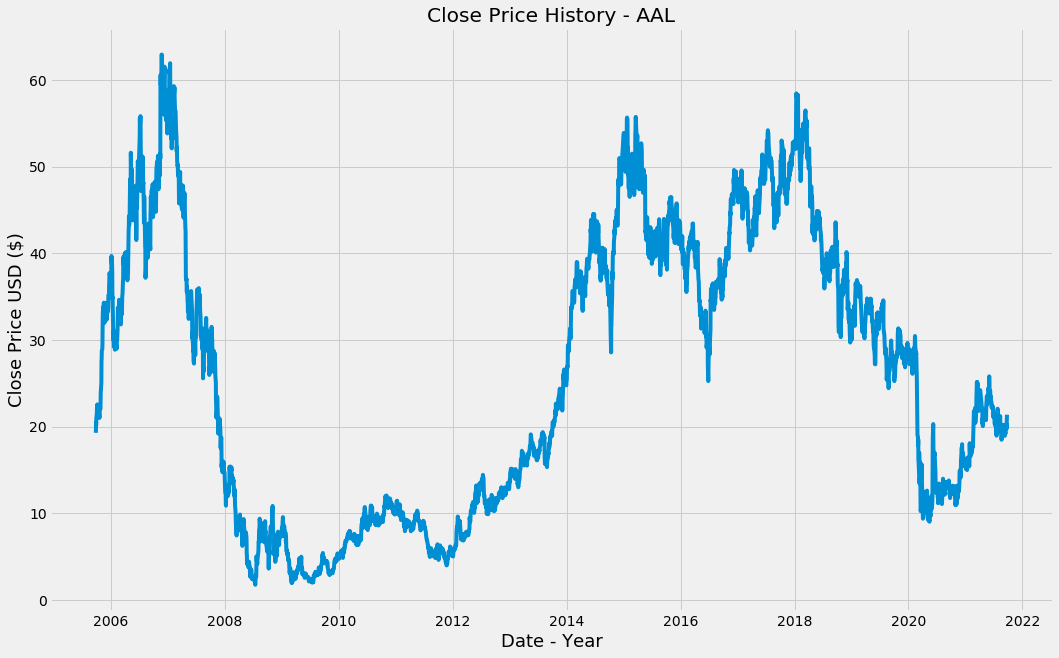

In [6]:
# Visualize the closing price  history 
plt.figure(figsize=(16,10))
plt.title('Close Price History - AAL')
plt.plot(data_frame['Close'])
plt.xlabel('Date - Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the Close Column 
data_frame2 = data_frame.filter(['Close'])
# Convert the dataframe to a numpy array 
dataset = data_frame2.values
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

3222

In [8]:
# Scale the data 
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.28664813],
       [0.30625919],
       [0.30151984],
       ...,
       [0.30658605],
       [0.3127962 ],
       [0.32080404]])

In [9]:
# Create the training dataset 
#create the scaled training dataset 
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets 
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.28664813, 0.30625919, 0.30151984, 0.31459389, 0.32260173,
       0.3333878 , 0.33404152, 0.34025167, 0.33322437, 0.33420492,
       0.33044614, 0.32685079, 0.32603365, 0.33518549, 0.3320804 ,
       0.3224383 , 0.32064061, 0.31475732, 0.33011928, 0.33583918,
       0.330773  , 0.33600261, 0.33992481, 0.36182382, 0.37457101,
       0.38012747, 0.42147408, 0.42670372, 0.44190225, 0.4440268 ,
       0.45219807, 0.4827586 , 0.50727241, 0.5162608 , 0.52279784,
       0.52492238, 0.52034643, 0.53211308, 0.51135805, 0.49403496,
       0.50236966, 0.51119465, 0.50808953, 0.51724137, 0.5089067 ,
       0.52018303, 0.53145936, 0.53145936, 0.49991826, 0.52067329,
       0.52606636, 0.52132701, 0.52492238, 0.52296123, 0.51462657,
       0.51936592, 0.52083675, 0.54567742, 0.54731165, 0.54845562])]
[0.5679032177214942]

[array([0.28664813, 0.30625919, 0.30151984, 0.31459389, 0.32260173,
       0.3333878 , 0.33404152, 0.34025167, 0.33322437, 0.33420492,
       0.33044614, 0.32685079, 0.326

In [10]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data 
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3162, 60, 1)

In [11]:
#Buil the LSTM model 
model = Sequential ()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [12]:
# Compiple the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model 
model.fit(x_train,y_train,batch_size=1,epochs=1)

3162/3162 [==============================] - 91s 28ms/step - loss: 0.0015


In [14]:
# Creating the testing data set 
# Create a new array coitaining scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 120: ,:]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, (len(test_data))):
               x_test.append(test_data[i-120:i, 0])

In [15]:
# Convert the data to a numpy array 
x_test = np.array(x_test)
#y_test = np.array

In [16]:
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(805, 120, 1)

In [18]:
# Give the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print (predictions)
predictions.shape

[[36.1583   ]
 [36.403408 ]
 [36.980152 ]
 [37.233364 ]
 [37.170795 ]
 [37.12023  ]
 [36.813286 ]
 [36.921913 ]
 [37.87861  ]
 [38.40368  ]
 [38.26038  ]
 [38.28955  ]
 [37.694073 ]
 [37.17033  ]
 [37.13948  ]
 [37.240883 ]
 [37.279537 ]
 [37.35617  ]
 [37.20429  ]
 [36.787388 ]
 [36.30797  ]
 [36.180027 ]
 [36.34735  ]
 [36.825314 ]
 [36.976196 ]
 [37.96367  ]
 [38.780106 ]
 [38.6288   ]
 [38.161118 ]
 [37.822826 ]
 [37.982525 ]
 [38.70599  ]
 [39.125122 ]
 [39.242928 ]
 [39.27295  ]
 [39.3953   ]
 [38.977013 ]
 [38.1269   ]
 [37.59231  ]
 [37.84715  ]
 [38.507557 ]
 [38.54244  ]
 [38.538994 ]
 [38.63234  ]
 [38.95034  ]
 [39.36247  ]
 [39.95105  ]
 [40.404713 ]
 [41.376507 ]
 [41.201527 ]
 [40.334576 ]
 [39.847816 ]
 [39.890812 ]
 [39.97225  ]
 [39.275604 ]
 [38.29332  ]
 [37.884747 ]
 [37.421032 ]
 [36.546993 ]
 [35.795128 ]
 [34.416245 ]
 [32.74896  ]
 [31.67279  ]
 [31.083836 ]
 [31.261152 ]
 [32.172688 ]
 [32.940784 ]
 [32.637234 ]
 [32.180595 ]
 [31.891031 ]
 [31.824186 ]
 [30.9

(805, 1)

In [19]:
# Evaluate our model, getting the root mean square error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.1266334097640283

In [20]:
# Plot the data
train = data_frame2[:training_data_len]
valid = data_frame2[training_data_len:]
#valid = pd.DataFrame(valid2)
valid['Predictions'] = predictions
print (valid)
#plt.plot(valid)
#plt.show()

                Close  Predictions
Date                              
2018-07-17  37.380001    36.158298
2018-07-18  38.369999    36.403408
2018-07-19  38.130001    36.980152
2018-07-20  37.880001    37.233364
2018-07-23  38.040001    37.170795
...               ...          ...
2021-09-20  20.330000    19.761745
2021-09-21  19.760000    20.039061
2021-09-22  20.520000    20.006527
2021-09-23  20.900000    20.205816
2021-09-24  21.389999    20.515644

[805 rows x 2 columns]


C:\Users\Matheus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-10-10  57.522499
2019-10-11  59.052502
2019-10-14  58.967499
2019-10-15  58.830002
2019-10-16  58.592499

[1960 rows x 1 columns]
                 Close  Predictions
Date                               
2019-10-17   58.820000    55.789654
2019-10-18   59.102501    55.937168
2019-10-21   60.127499    56.079514
2019-10-22   59.990002    56.378014
2019-10-23   60.794998    56.649933
...                ...          ...
2021-09-20  142.940002   133.509186
2021-09-21  143.429993   132.268845
2021-09-22  145.850006   131.234818
2021-09-23  146.830002   130.928024
2021-09-24  146.919998   131.112228

[489 rows x 2 columns]


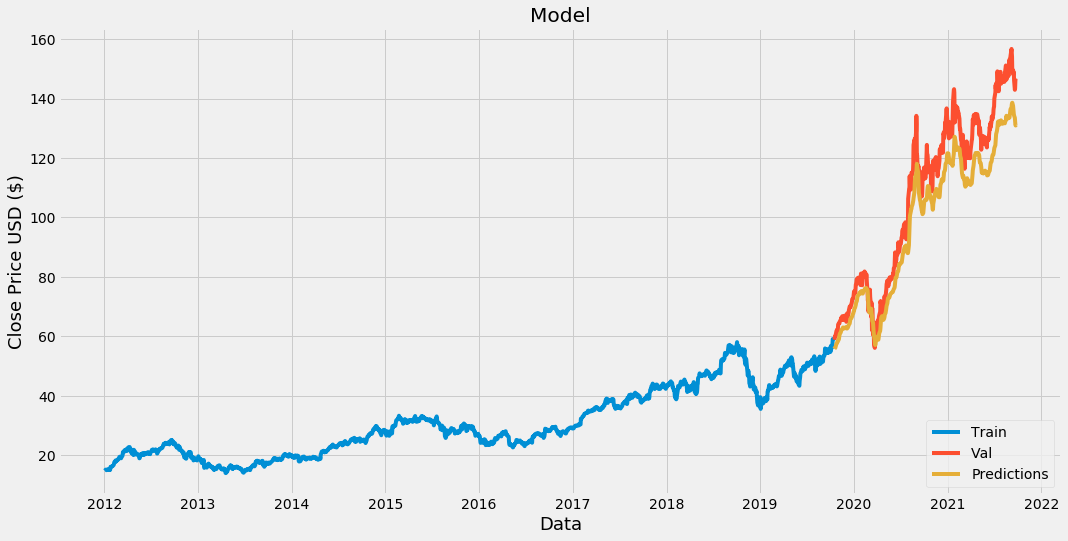

In [23]:
# Plot the data
train = data_frame2[:training_data_len]
print (train)
#valid = data_frame2[training_data_len:]
#valid['Close'] = predictions
print(valid)
#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [21]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-17,37.380001,36.158298
2018-07-18,38.369999,36.403408
2018-07-19,38.130001,36.980152
2018-07-20,37.880001,37.233364
2018-07-23,38.040001,37.170795
...,...,...
2021-09-20,20.330000,19.761745
2021-09-21,19.760000,20.039061
2021-09-22,20.520000,20.006527


In [22]:
# Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-09-27')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and covert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
#Create a empty list 
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data to be 3 dimentional 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
# Get the predicted scaled price 
pred_price = model.predict(X_test)
# Undo the scaling 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[136.47975]]


In [38]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-09-27', end='2021-09-27')
print (apple_quote2['Close'])

Date
2021-09-27    145.369995
Name: Close, dtype: float64
